In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [5]:
df = pd.read_csv('pairs_limpieza.csv', index_col=0)
df.head(3)

,case_number,year,type,country,area,location,activity,name,age,time,species,injury,fecha_limpia,fatal_limpio,sexo
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,"FATAL, all onboard were killed by sharks",unspecified,Y,F
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,FATAL,May,Y,NaN
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,NaN,NaN,NaN,"FATAL, PROVOKED INCIDENT",Sep,Y,M


# Ejercicio 1. Establecer el tamaño de las figuras

In [89]:
plt.rcParams["figure.figsize"] = (12,10)

# Ejercicio 2. Contestad las preguntas

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [7]:
df['country'].unique()

array(['seychelles', nan, 'england', 'australia', 'barbados', 'jamaica',
       'martinique', 'usa', 'guinea', 'greenland', 'france', 'spain',
       'mediterranean sea', 'cuba', 'sweden', 'panama', 'italy',
       'iceland', 'roatan', 'india', 'between portugal & india',
       'venezuela', 'mexico', 'greece', 'canada', 'kenya', 'uruguay',
       'papua new guinea', 'bermuda', 'lebanon', 'sudan', 'djibouti',
       'libya', 'new zealand', 'vietnam', 'sri lanka', 'mozambique',
       'south africa', 'bahrein', 'bahamas', 'reunion', 'solomon islands',
       'korea', 'french polynesia', 'vanuatu', 'iran', 'red sea?',
       'singapore', 'fiji', 'iraq', 'madagascar', 'indonesia',
       'nicaragua', 'marshall islands', 'kiribati', 'north pacific ocean',
       'saudi arabia', 'pacific ocean', 'burma', 'belize', 'asia?',
       'ceylon (sri lanka)', 'brazil', 'thailand', 'costa rica',
       'maldives', 'new caledonia', 'ecuador', 'malaysia', 'mauritius',
       'samoa', 'japan', 'egypt',

/home/lcp87/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


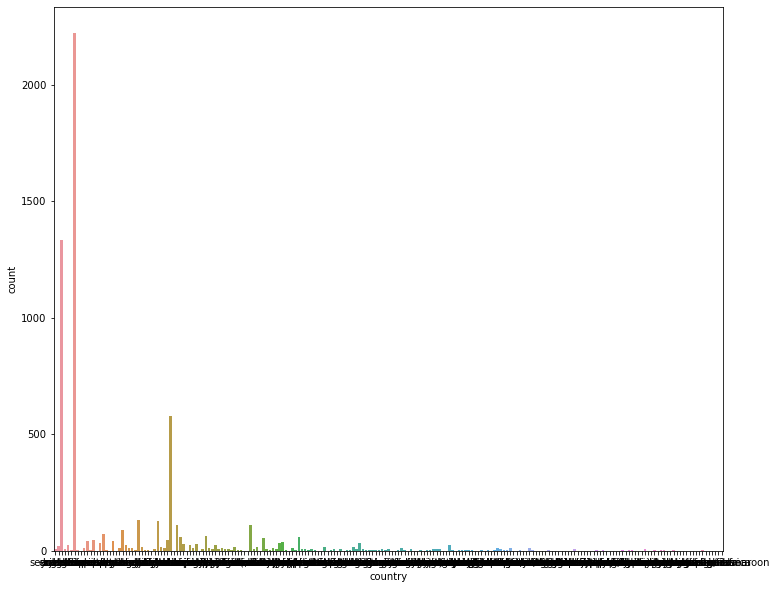

In [91]:
sns.countplot(df['country']);

Como vemos en la gráfica eligiendo todos los paises de la columna, no se ve nada claro, por lo que pasaremos a elegir los 10 paises con más ataques para representarlo.

In [99]:
df_cuenta = pd.DataFrame(df['country'].value_counts()).T
df_cuenta

,usa,australia,south africa,papua new guinea,new zealand,brazil,bahamas,mexico,italy,fiji,...,mayotte,bahrein,gabon,andaman / nicobar islandas,korea,maldive islands,nicaragua,north sea,red sea / indian ocean,ghana
country,2222,1335,577,134,127,112,109,88,70,65,...,1,1,1,1,1,1,1,1,1,1


Aquí vemos cuántos ataques hubo por país.

In [103]:
df_country = df.stb.freq(['country'])
df_country.head()

,country,count,percent,cumulative_count,cumulative_percent
0,usa,2222,35.643247,2222,35.643247
1,australia,1335,21.414822,3557,57.058069
2,south africa,577,9.255695,4134,66.313763
3,papua new guinea,134,2.149503,4268,68.463266
4,new zealand,127,2.037215,4395,70.500481


Y aquí observamos qué tanto por ciento de ataques ha tenido cada uno de los países.

Seleccionamos los 10 países con más ataques

In [104]:
df_country_10 = df_country[:10]
df_country_10

,country,count,percent,cumulative_count,cumulative_percent
0,usa,2222,35.643247,2222,35.643247
1,australia,1335,21.414822,3557,57.058069
2,south africa,577,9.255695,4134,66.313763
3,papua new guinea,134,2.149503,4268,68.463266
4,new zealand,127,2.037215,4395,70.500481
5,brazil,112,1.796599,4507,72.297081
6,bahamas,109,1.748476,4616,74.045557
7,mexico,88,1.411614,4704,75.457170
8,italy,70,1.122875,4774,76.580045
9,fiji,65,1.042669,4839,77.622714


In [105]:
lista_paises_10 = list(df_country_10['country'])
lista_paises_10

['usa',
 'australia',
 'south africa',
 'papua new guinea',
 'new zealand',
 'brazil',
 'bahamas',
 'mexico',
 'italy',
 'fiji']

In [106]:
df_country_10_2 = df[df['country'].isin(lista_paises_10)]


In [109]:
df_country_10_2.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species,injury,fecha_limpia,fatal_limpio,sexo
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",NaN,NaN,NaN,"FATAL, ""bitten in two""",unspecified,Y,F
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,"No injury to occupants, shark bit oar and rudder",May,N,NaN


In [111]:
#Comprobamos que estan solo los 10 paises
df_country_10_2['country'].unique().size

10

/home/lcp87/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' Nº de ataques por país')

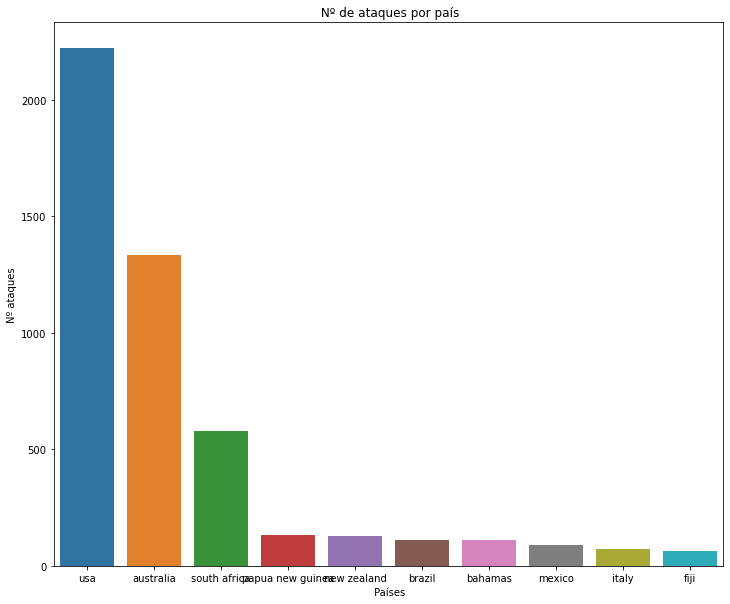

In [116]:
ax = sns.barplot(df_country_10['country'], df_country_10['count'])
ax.set(xlabel = " Países", ylabel= "Nº ataques")
plt.title(" Nº de ataques por país")

Hemos decidido usar un gráfico barplot ya que calculamos la frecuencia previamente, si no hubieramos utilizado un histograma o un countplot.

/home/lcp87/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


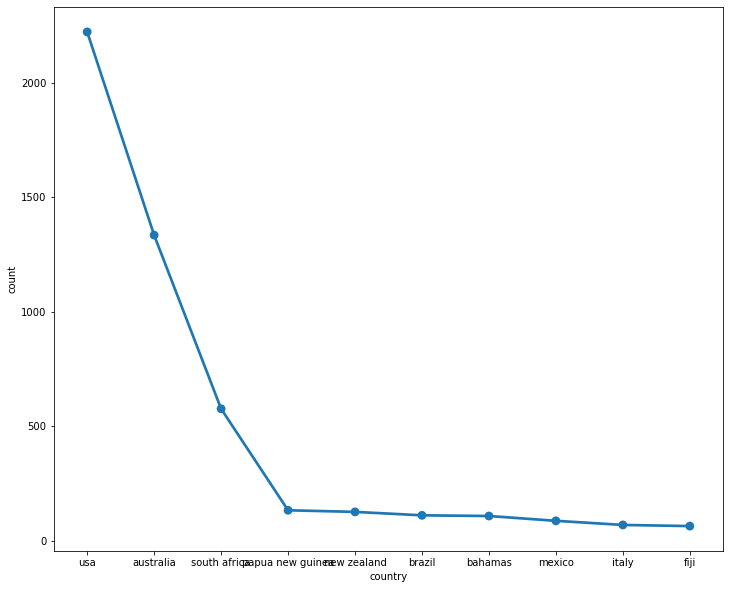

In [117]:
sns.pointplot(df_country_10['country'], df_country_10['count']);

Añadimos también este gráfico porque creemos que es interesante observar como disminuye el número de ataques por pais entre el top 10.

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [176]:
df_country_10_2.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species,injury,fecha_limpia,fatal_limpio,sexo
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",NaN,NaN,NaN,"FATAL, ""bitten in two""",unspecified,Y,F
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,"No injury to occupants, shark bit oar and rudder",May,N,NaN


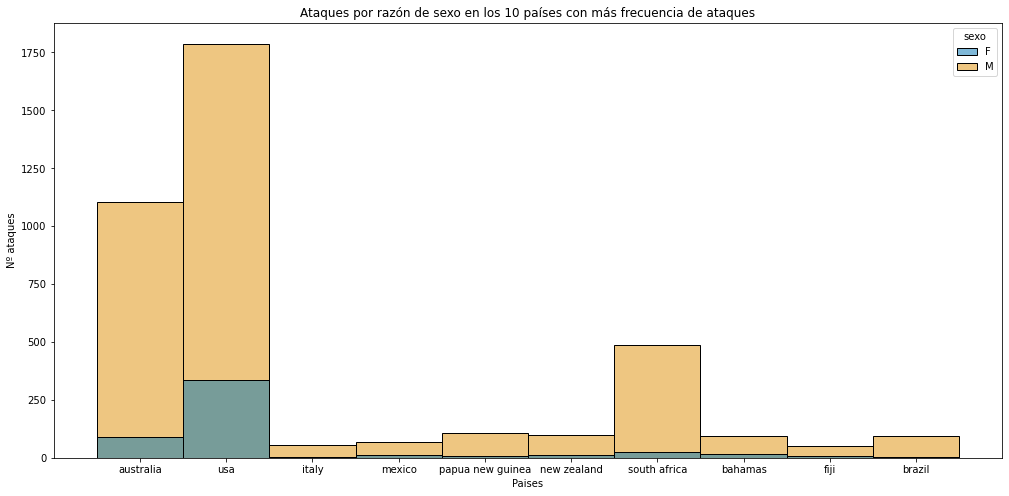

In [180]:
plt.figure(figsize =(17,8))
fig = sns.histplot(x='country', data = df_country_10_2,hue = 'sexo',  palette = 'colorblind')
fig.set(xlabel='Paises', ylabel = 'Nº ataques')
fig.set_title('Ataques por razón de sexo en los 10 países con más frecuencia de ataques')
plt.show()

Observamos una diferencia contundente entre los ataques entre hombres y mujeres en los 10 países donde ha habido más ataques. En la gráfica vemos que la mayoría de los ataques los han sufrido hombres (M)

- ¿Qué edad recibe mayor número de ataques? Pista: usa cut

Vamos a dividir las edades en estos rangos: 0 - 12 años: child, 13 a 29 años: young adult, de 30 a 55 adult y +55 senior

In [ ]:
df['age'].unique()

Descomenta estas céldas cuando corras con Age bien

In [84]:
# edad_min = df['age'].describe()[4]
edad_min = 0

In [85]:
# edad_max = df['age'].describe()[7]
# bins = np.arange(edad_min, edad_max + 5, 15)
edad_max = 70

In [ ]:
bins = [edad_min,13,30,55,edad_max]
pd.cut(df['age'], bins = bins)

In [ ]:
df["age"].plot(kind = "pie", subplots = True, figsize = (8,8), dpi = 80)
plt.title("Ataques por rango de edad")
plt.show()

- Ataques entre sexos, ¿hay diferencia?

In [38]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species,injury,fecha_limpia,fatal_limpio,sexo
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,"FATAL, all onboard were killed by sharks",unspecified,Y,F
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,FATAL,May,Y,NaN


In [45]:
df_sexo = df.groupby(by = df['sexo']).count()
df_sexo.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species,injury,fecha_limpia,fatal_limpio
sexo,,,,,,,,,,,,,,
F,635,635,635,632,614,606,584,630,464,386,369,635,635,575
M,5084,5085,5081,5042,4714,4642,4745,5026,2962,2454,2766,5071,5085,4647


Observamos que existen diferencias entre sexos. Ha habido muchos más ataques a hombres (M), exactamente 5084, que los 635 que les han ocurrido a mujeres (F). Lo podemos observar en la columna de case_number gracias al conteo que nos hizo el group by por sexo.

- ¿Cuándo ocurren más ataques? ¿Os sale algo raro en la gráfica?

/home/lcp87/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


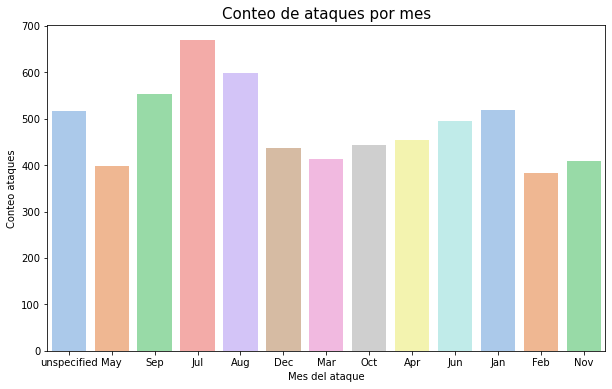

In [66]:
df_fecha = df.groupby(['fecha_limpia']).count()

fig = plt.figure(1,(10,6))
sns.countplot(df['fecha_limpia'], palette = 'pastel')
plt.title('Conteo de ataques por mes', fontsize=15)
plt.xlabel('Mes del ataque')
plt.ylabel('Conteo ataques')
plt.show()

Observamos que Julio y Agosto es el mes en el que más ataques se han registrado. También observamos que existe un gran número de ataques en el que no se ha registrado el mes en el que ocurrieron.